In [1]:
# Libraries
import datetime as dt
import format_database as FORMATTHISDATABASE
import helper as HELPMEPLEASE
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats as stats
import seaborn as sns

# Parameters and variables
XLS_PATH     = "Database.xlsx"
ROLLING_WINDOW = 252 
SAVE_PLOTS     = False 
ASSETS  =  [
    'NATIONAL AUS.BANK - TOT RETURN IND',
    'ASX - TOT RETURN IND',
    'INSURANCE AUS.GROUP - TOT RETURN IND',
    'ORIGIN ENERGY (EX BORAL) - TOT RETURN IND',
    'WOODSIDE ENERGY GROUP - TOT RETURN IND',
    'APA GROUP - TOT RETURN IND',
    'SANTOS - TOT RETURN IND',
    'WASH.H SOUL PATSN.& CO. DFD. - TOT RETURN IND',
    'PRO MEDICUS - TOT RETURN IND',
    'CSL - TOT RETURN IND',
    'REA GROUP - TOT RETURN IND',
    'GOODMAN GROUP - TOT RETURN IND',
    'STOCKLAND STAPLED UNITS - TOT RETURN IND',
    'WOOLWORTHS GROUP - TOT RETURN IND',
    'WESFARMERS - TOT RETURN IND',
    'QANTAS AIRWAYS - TOT RETURN IND',
    'TECHNOLOGY ONE - TOT RETURN IND',
    'TELSTRA GROUP - TOT RETURN IND',
    'FORTESCUE - TOT RETURN IND',
    'RIO TINTO - TOT RETURN IND']


In [2]:
if "TotalReturnIndices" not in pd.ExcelFile(XLS_PATH).sheet_names:
    FORMATTHISDATABASE.create_TotalReturnIndices(
        excel_path    = XLS_PATH,
        chosen_assets = ASSETS
    )

RI_df = pd.read_excel(
    XLS_PATH, 
    sheet_name="TotalReturnIndices")

# Convert DATE to datetime (easier to handle)
RI_df["DATE"] = pd.to_datetime(RI_df["DATE"])
# Set DATE as index
RI_df.set_index("DATE", inplace=True)

# Calculate log-returns
returns_df = 100*np.log(RI_df / RI_df.shift(1)).dropna()

The whole point 2 is computed by a single function, see its description for more information (or take a peek at helper.py).

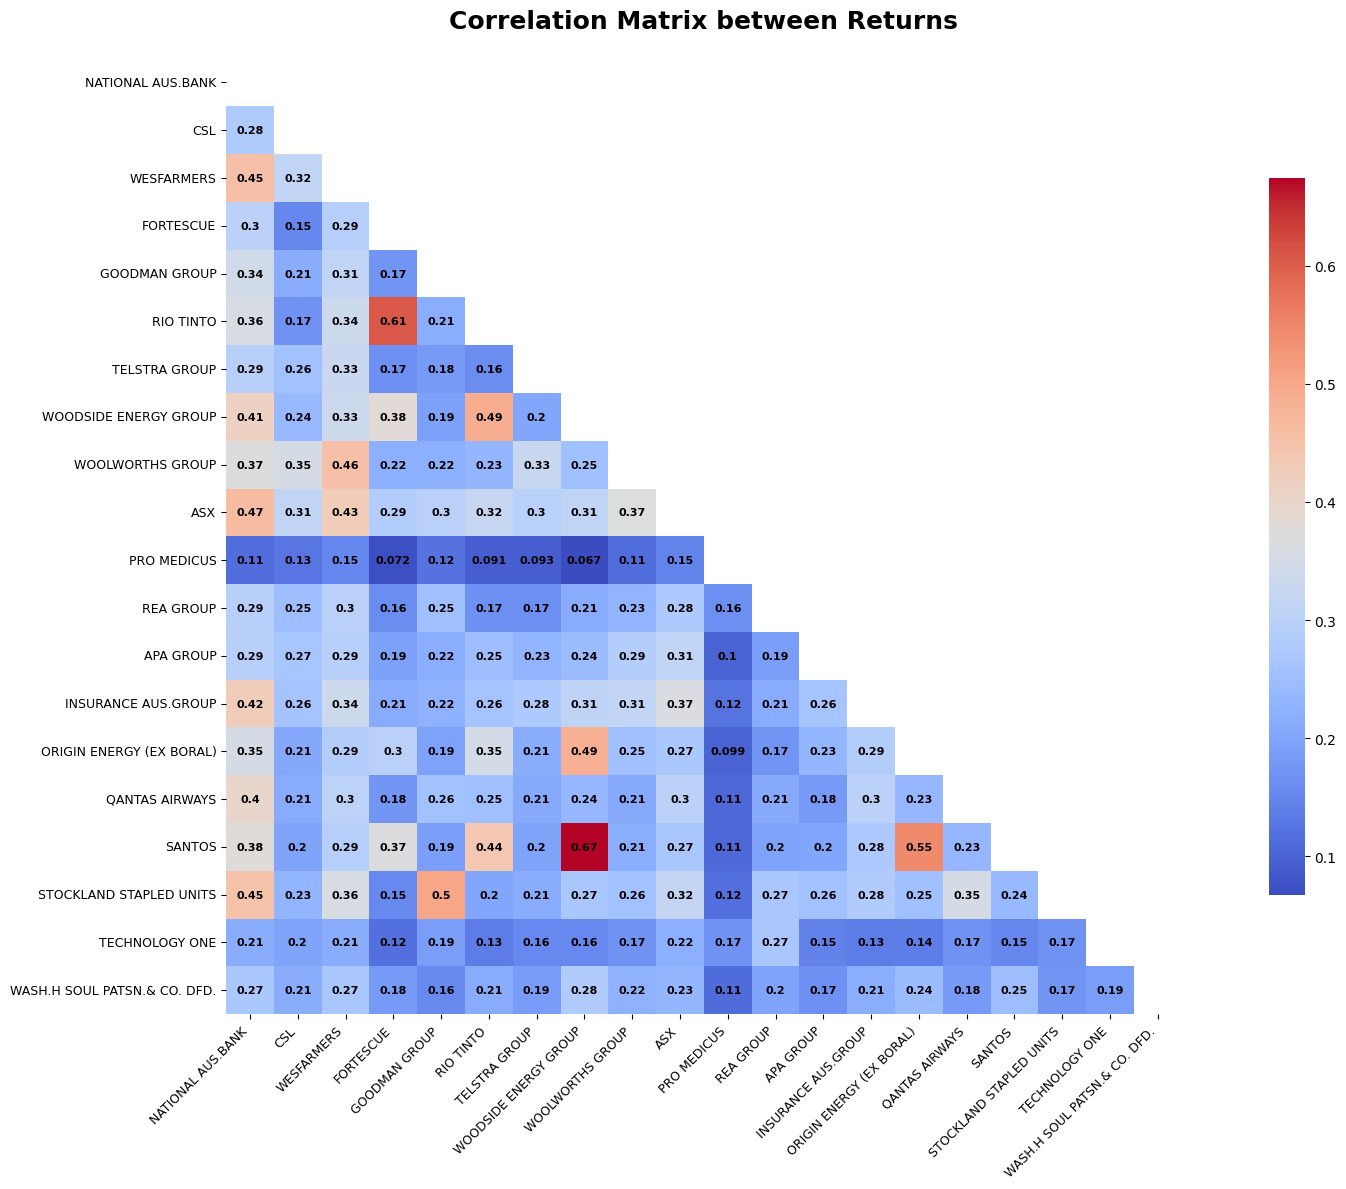

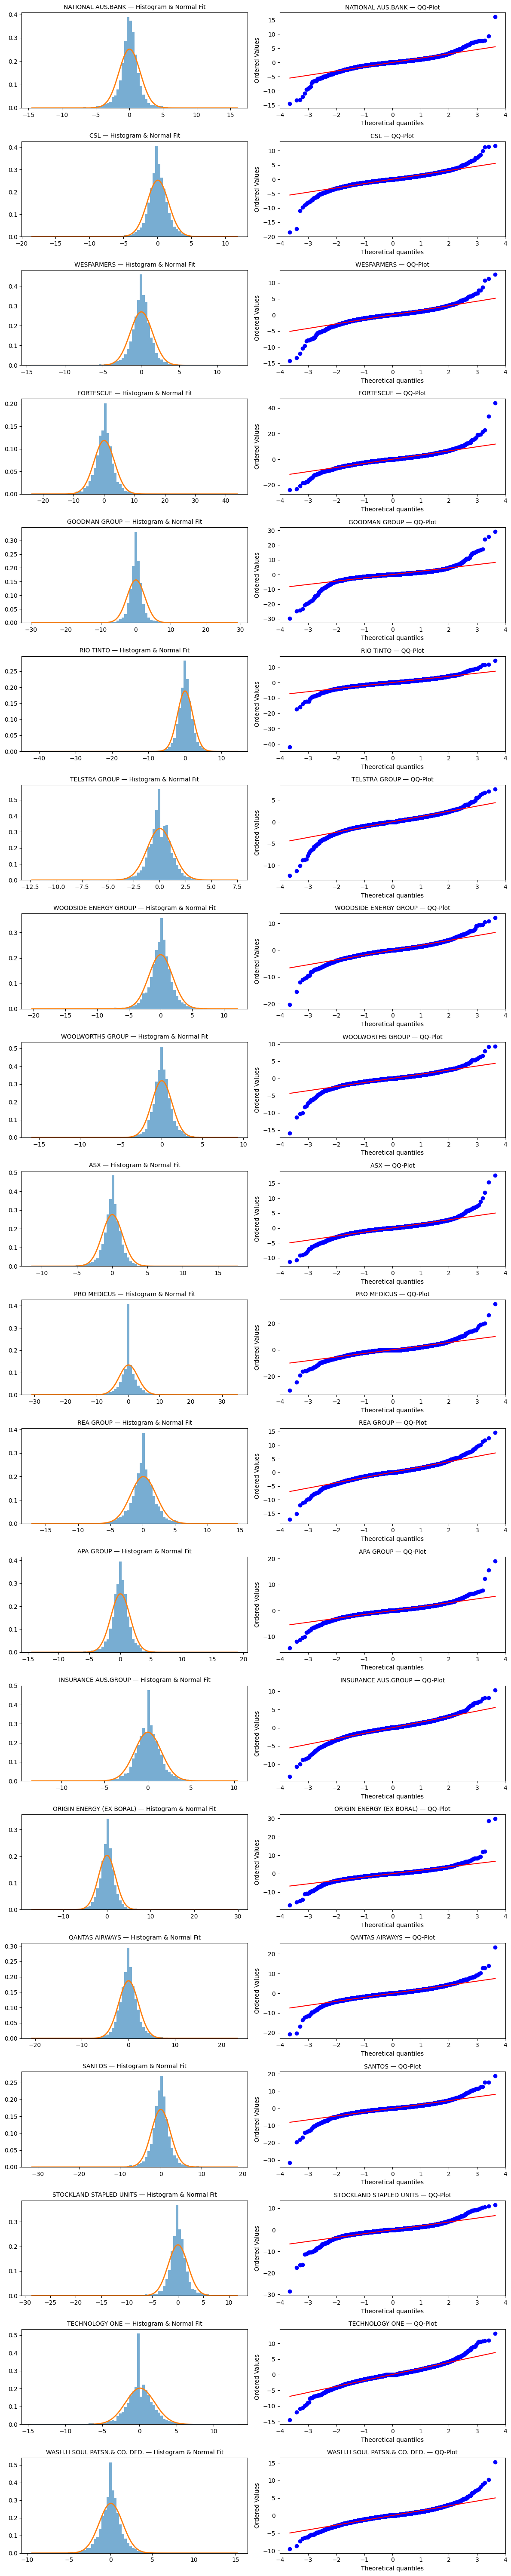

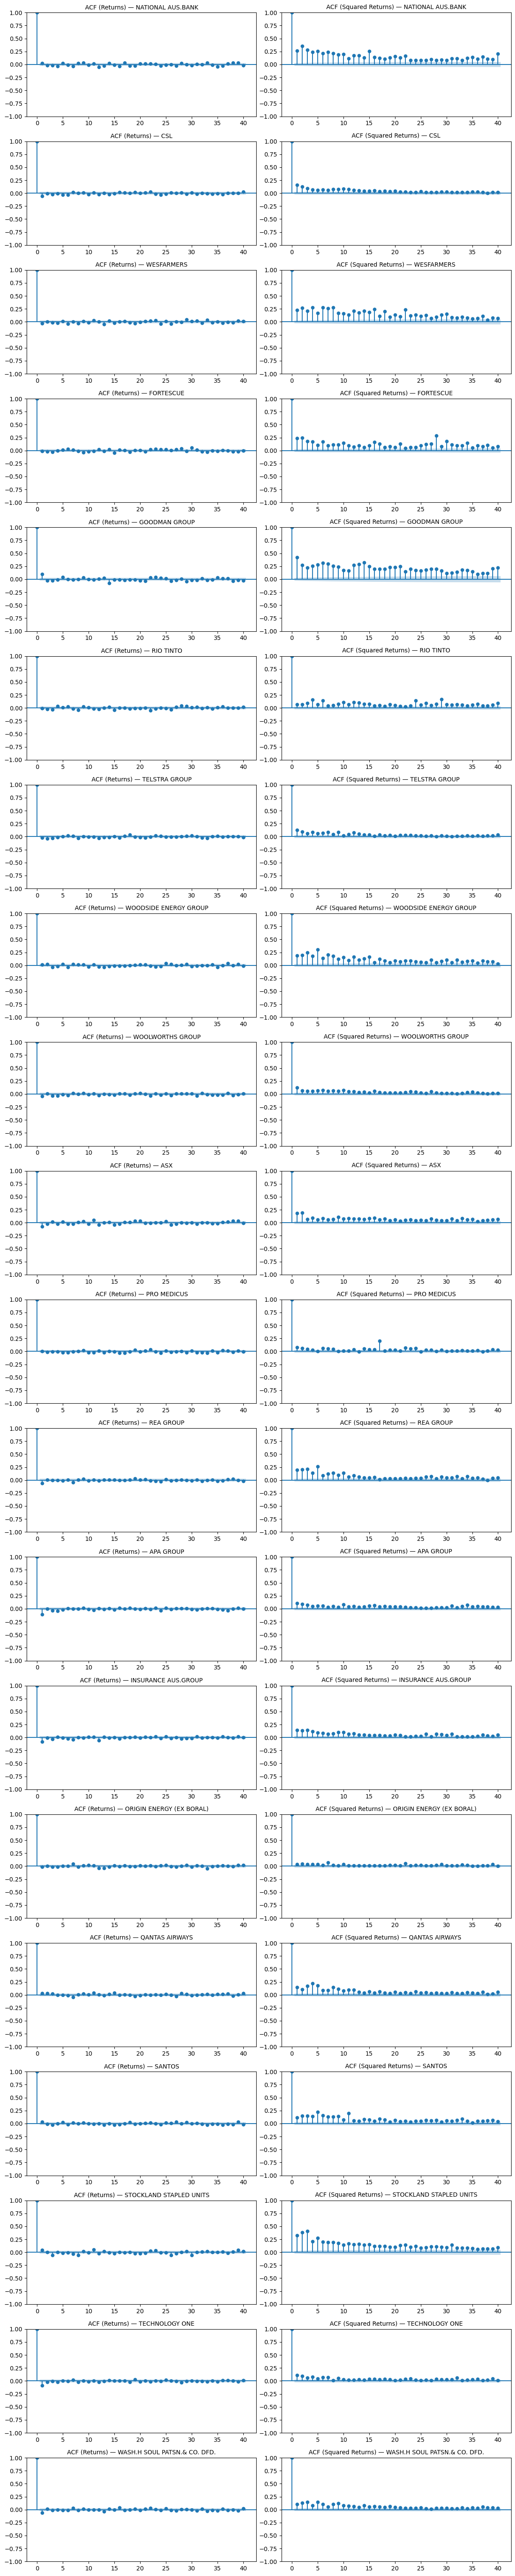

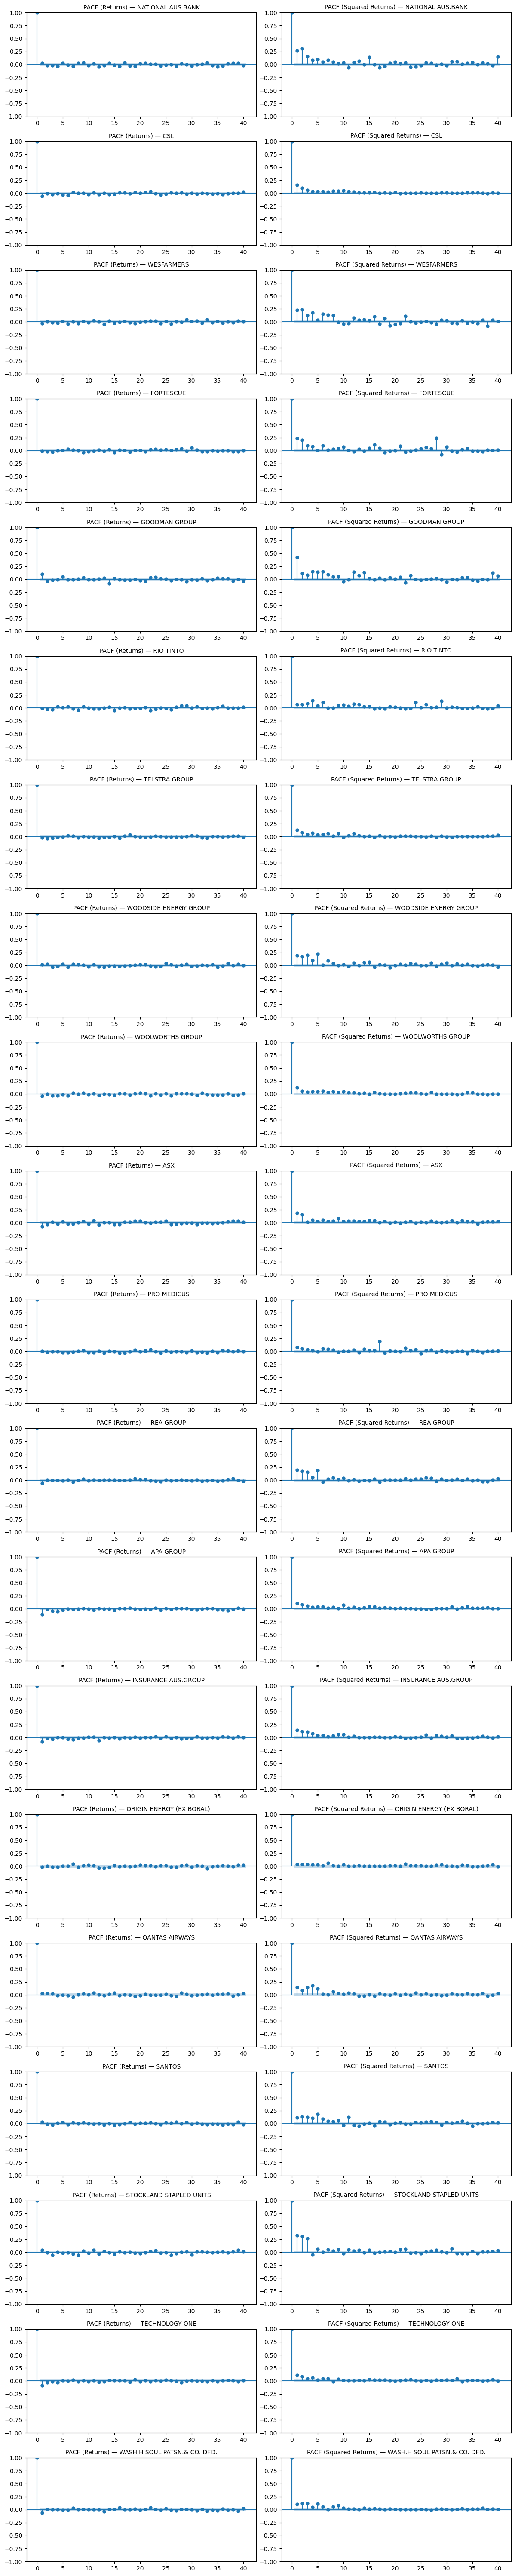

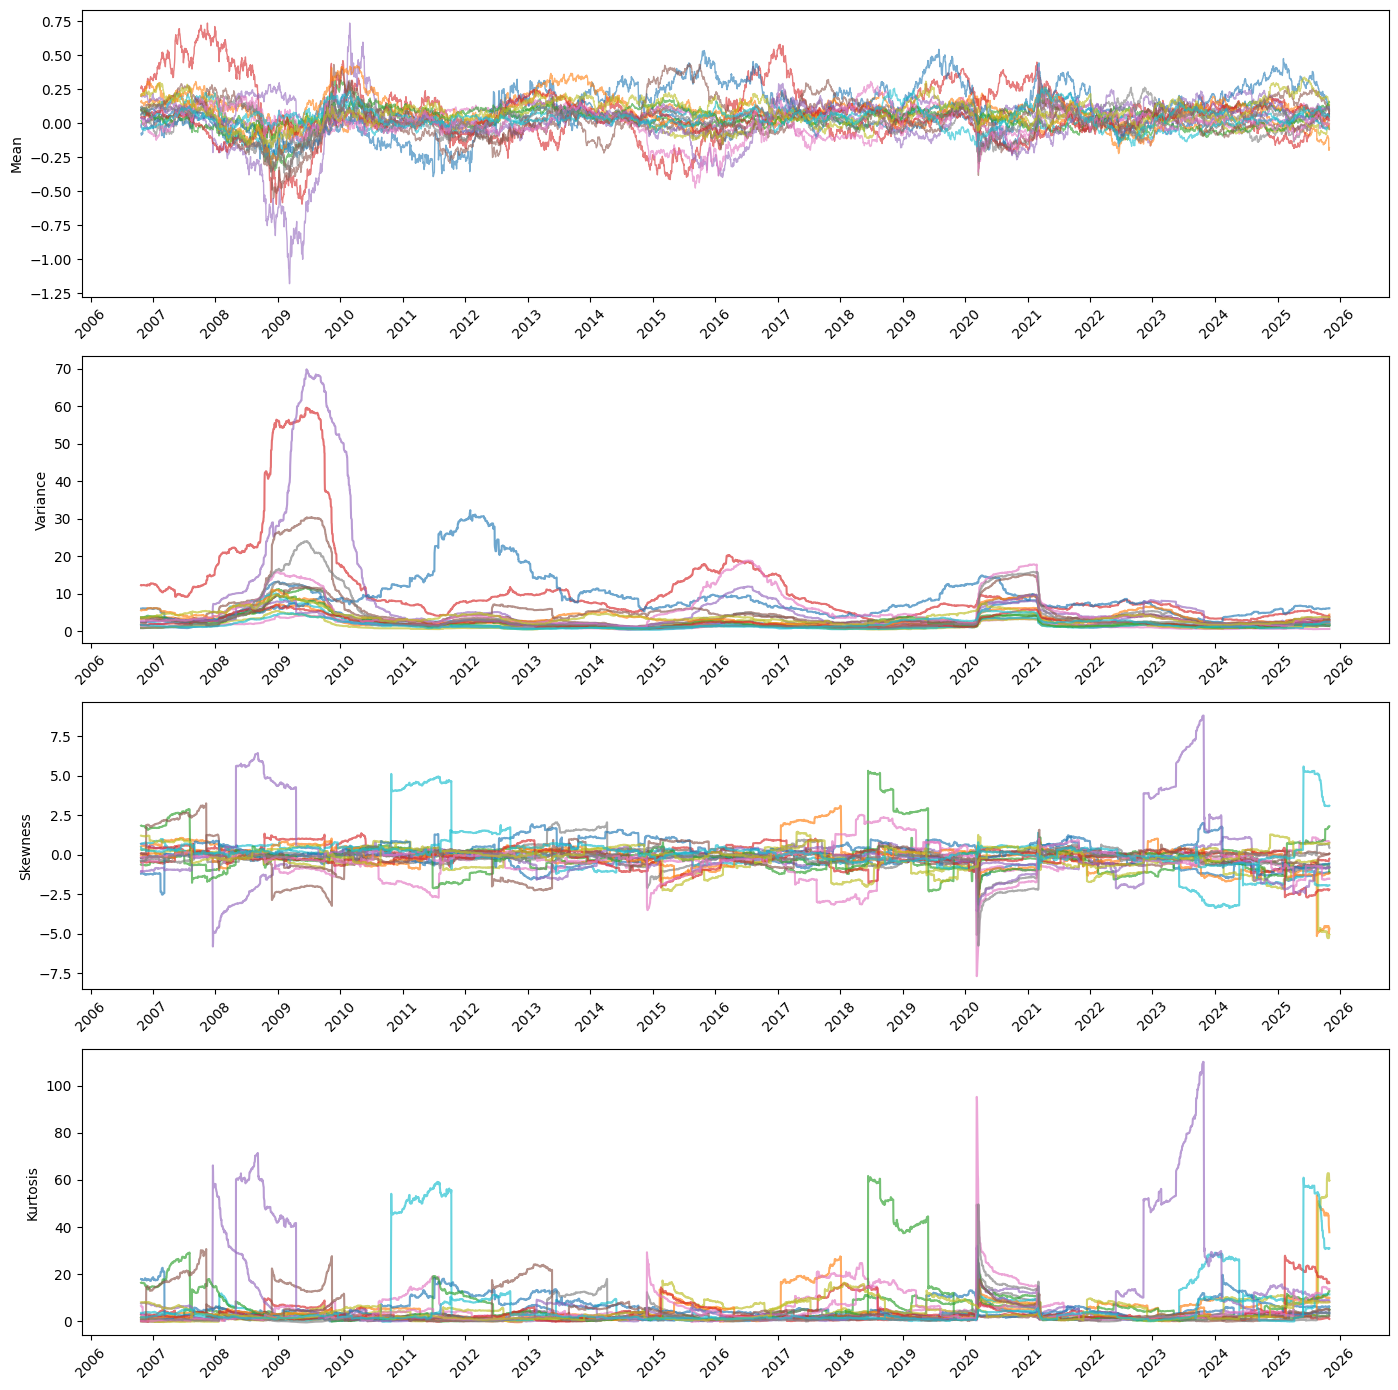

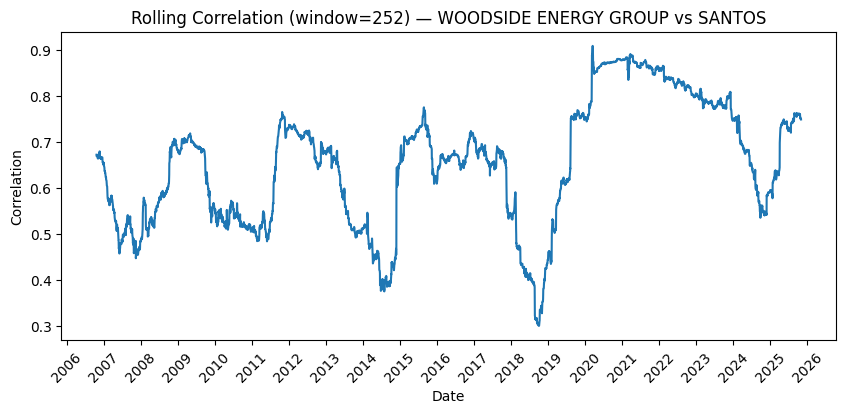

In [3]:
# Display descriptive statistics (more information in function description)
descriptive_stat_df = HELPMEPLEASE.visual_descriptive_statistics(returns_df, plot=True, save=SAVE_PLOTS)

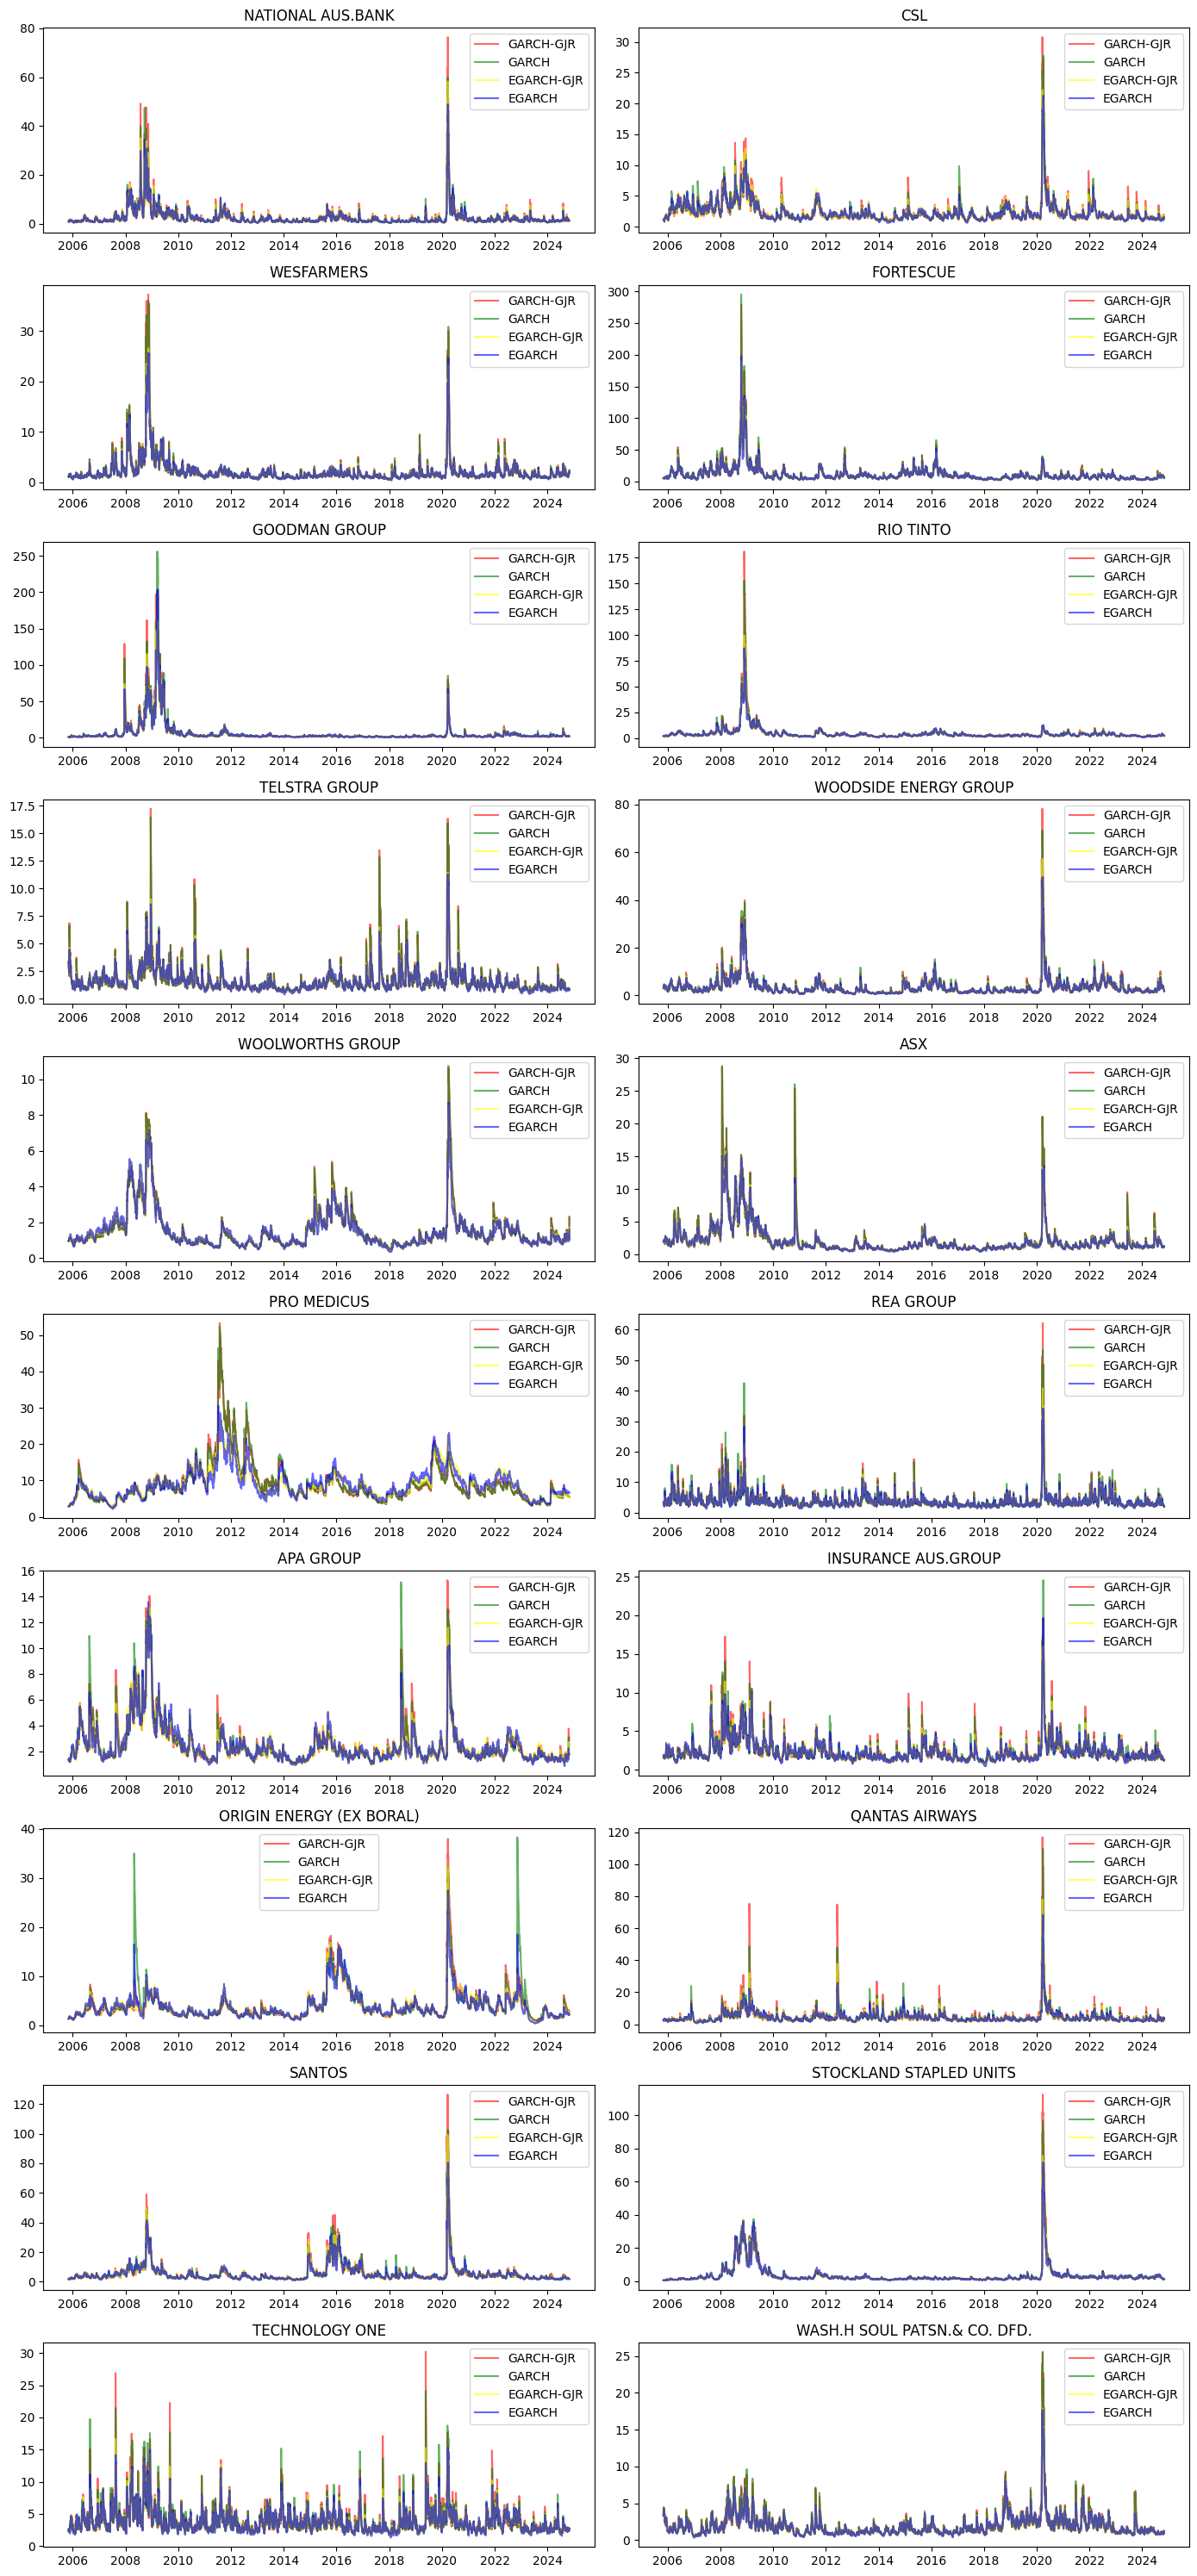

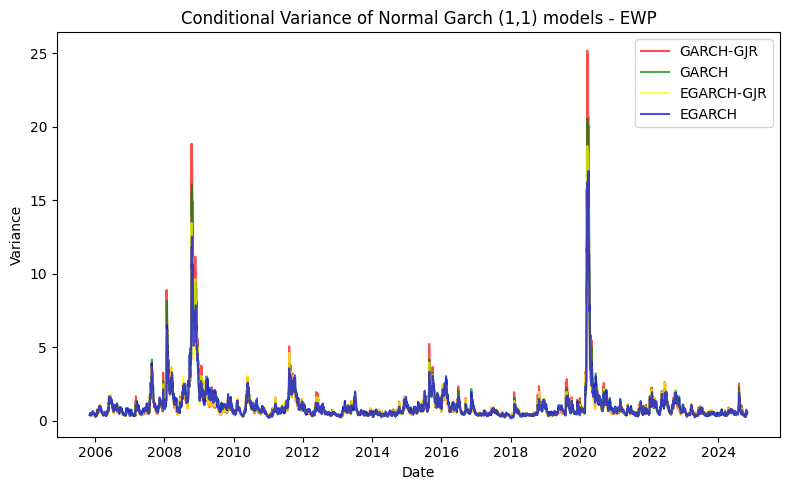

GARCH:
[18921.63300642097, 18947.665616208025]
GARCH-GJR:
[18901.85203256596, 18934.39279479978]
EGARCH:
[18923.17445105612, 18949.207060843175]
EGARCH-GJR:
[18898.147607648585, 18930.688369882406]
GARCH:
[12728.370986238482, 12754.403596025539]
GARCH-GJR:
[12636.99887874618, 12669.539640980001]
EGARCH:
[12745.51934058981, 12771.551950376866]
EGARCH-GJR:
[12627.827790168329, 12660.36855240215]


In [ ]:
# Split sample (exclude last year)
cutoff_start = dt.datetime(2024, 11, 1)
cutoff_end   = dt.datetime(2025, 10, 31)
train = returns_df.loc[returns_df.index < cutoff_start]
test  = returns_df.loc[(returns_df.index >= cutoff_start) & (returns_df.index <= cutoff_end)]

ewp = train.mean(axis=1)

garch_diagnostics = HELPMEPLEASE.univariate_garch_diagnostics(train, plot=True, save=SAVE_PLOTS)
ewp_garch_results = HELPMEPLEASE.ewp_garch_diagnostics(ewp)

for x in garch_diagnostics.keys():
    print(f"{x}: {garch_diagnostics[x]}")
for x in ewp_garch_results.keys():
    print(f"{x}: {ewp_garch_results[x]}")